## Nijmi Bajracharya Group:L5CG11 ID:2508912 Regression Tasks:

# Task 1: Exploratory Data Analysis (EDA)

### 1.1 Problem Statement

Heart disease is one of the leading causes of death among adults worldwide. Understanding and predicting heart disease mortality rates is essential for public health planning and resource allocation.

The problem addressed in this project is to build regression models that can predict heart disease mortality rates among adults aged 35 and above using demographic and regional health data.

### 1.2 Dataset Description

For the regression task, the dataset used was obtained from the U.S. government open data catalog. This dataset contains heart disease mortality rates across U.S. states, territories, and counties from 2018 to 2020.

**Heart Disease Mortality Data (US Adults 35+)**  
Access link: https://catalog.data.gov/dataset/heart-disease-mortality-data-among-us-adults-35-by-state-territory-and-county-2018-2020-3a2b0

The dataset includes:
- Age-adjusted mortality rates
- Geographic information (state, county)
- Other demographic indicators that may impact heart disease outcomes

- **Source:** U.S. Government Open Data Catalog
- **Format:** CSV
- **Target Variable:** Heart disease mortality rate (continuous value)

### 1.3 UNSDG Alignment

This regression project aligns with **UNSDG 3: Good Health and Well-Being** because it supports analysis of public health data on heart disease mortality — a leading cause of death globally. Regression models can help identify factors associated with mortality trends and support planning for public health interventions.

### 1.4 Key Questions Addressed by the Dataset

This dataset helps answer:
1. What demographic or health-related factors are associated with higher heart disease mortality rates?
2. How accurately can machine learning models predict heart disease mortality rate based on regional and demographic features?
3. Which features are most strongly correlated with heart disease outcomes?



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [43]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/Concept & technology of AI/heart_disease.csv"
)

df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2019,MO,Ray County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,531.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Male,Race/Ethnicity,Black,T2,29177,39.353614,-93.996813
1,2019,MT,Montana,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",~,Insufficient Data,Sex,Male,Race/Ethnicity,Black,T2,30,47.033200,-109.653000
2,2019,MT,Montana,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, 3-year Average Rate",~,Insufficient Data,Sex,Female,Race/Ethnicity,Black,T2,30,47.033200,-109.653000
3,2019,MT,Montana,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,234.0,"per 100,000 population","Age-adjusted, 3-year Average Rate",NaN,NaN,Sex,Overall,Race/Ethnicity,Hispanic,T2,30,47.033200,-109.653000
4,2019,MT,Montana,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,285.3,"per 100,000 population","Age-adjusted, 3-year Average Rate",NaN,NaN,Sex,Male,Race/Ethnicity,Hispanic,T2,30,47.033200,-109.653000


In [44]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59094 non-null  int64  
 1   LocationAbbr                59094 non-null  object 
 2   LocationDesc                59094 non-null  object 
 3   GeographicLevel             59094 non-null  object 
 4   DataSource                  59094 non-null  object 
 5   Class                       59094 non-null  object 
 6   Topic                       59094 non-null  object 
 7   Data_Value                  33087 non-null  float64
 8   Data_Value_Unit             59094 non-null  object 
 9   Data_Value_Type             59094 non-null  object 
 10  Data_Value_Footnote_Symbol  26007 non-null  object 
 11  Data_Value_Footnote         26007 non-null  object 
 12  StratificationCategory1     59094 non-null  object 
 13  Stratification1             590

In [45]:
# Check missing values
df.isna().sum().sort_values(ascending=False)


,0
Data_Value_Footnote,33087
Data_Value_Footnote_Symbol,33087
Data_Value,26007
Y_lat,18
X_lon,18
LocationDesc,0
LocationAbbr,0
Year,0
GeographicLevel,0
Class,0


In [46]:
# Keep only relevant columns for regression
df = df[[
    "Year",
    "LocationDesc",
    "GeographicLevel",
    "Stratification1",
    "Stratification2",
    "Data_Value",
    "Y_lat",
    "X_lon"
]]

df.head()


,Year,LocationDesc,GeographicLevel,Stratification1,Stratification2,Data_Value,Y_lat,X_lon
0,2019,Ray County,County,Male,Black,531.9,39.353614,-93.996813
1,2019,Montana,State,Male,Black,NaN,47.033200,-109.653000
2,2019,Montana,State,Female,Black,NaN,47.033200,-109.653000
3,2019,Montana,State,Overall,Hispanic,234.0,47.033200,-109.653000
4,2019,Montana,State,Male,Hispanic,285.3,47.033200,-109.653000


Remove missing target values

In [47]:
# Remove rows with missing target variable
df_clean = df.dropna(subset=["Data_Value"])

print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)


Before cleaning: (59094, 8)
After cleaning: (33087, 8)


EDA GRAPHS

Graph 1: Distribution of target variable

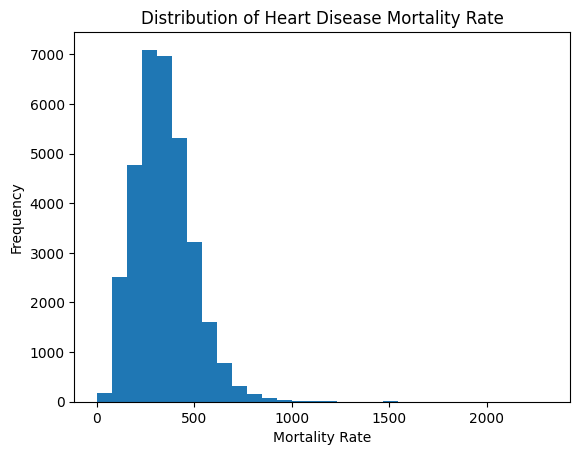

In [48]:
plt.figure()
plt.hist(df_clean["Data_Value"], bins=30)
plt.title("Distribution of Heart Disease Mortality Rate")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")
plt.show()


Graph 2: Mortality rate by year

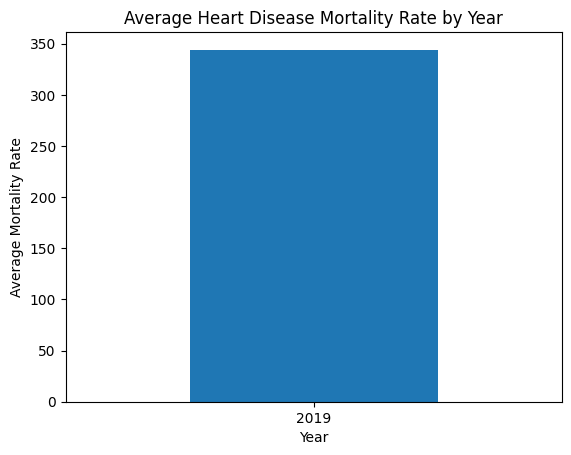

In [49]:
year_mean = df_clean.groupby("Year")["Data_Value"].mean()

plt.figure()
year_mean.plot(kind="bar")
plt.title("Average Heart Disease Mortality Rate by Year")
plt.xlabel("Year")
plt.ylabel("Average Mortality Rate")
plt.xticks(rotation=0)
plt.show()


Mortality rate by geographic level

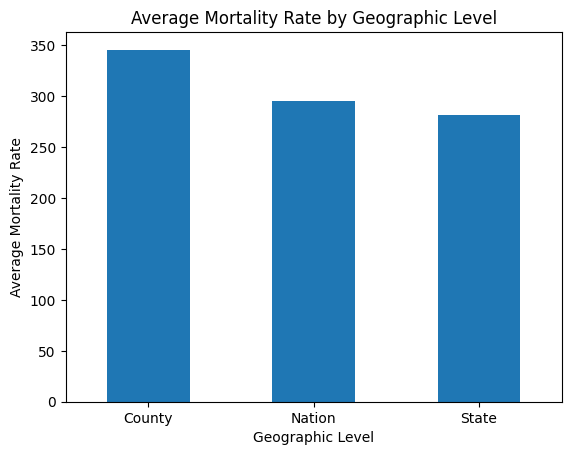

In [50]:
geo_mean = df_clean.groupby("GeographicLevel")["Data_Value"].mean()

plt.figure()
geo_mean.plot(kind="bar")
plt.title("Average Mortality Rate by Geographic Level")
plt.xlabel("Geographic Level")
plt.ylabel("Average Mortality Rate")
plt.xticks(rotation=0)
plt.show()


Graph 4: Mortality rate by sex

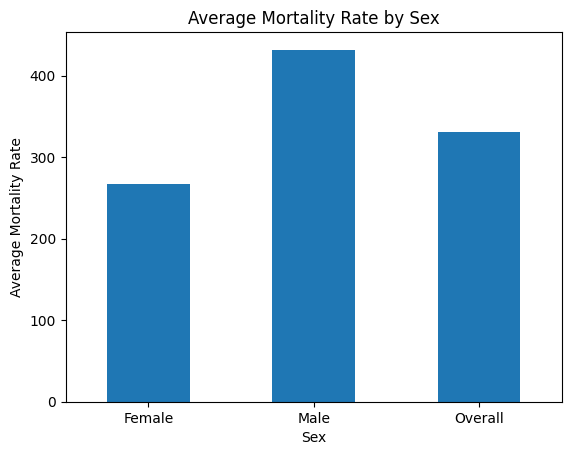

In [51]:
sex_mean = df_clean.groupby("Stratification1")["Data_Value"].mean()

plt.figure()
sex_mean.plot(kind="bar")
plt.title("Average Mortality Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Mortality Rate")
plt.xticks(rotation=0)
plt.show()


Graph 5: Correlation matrix (numeric)

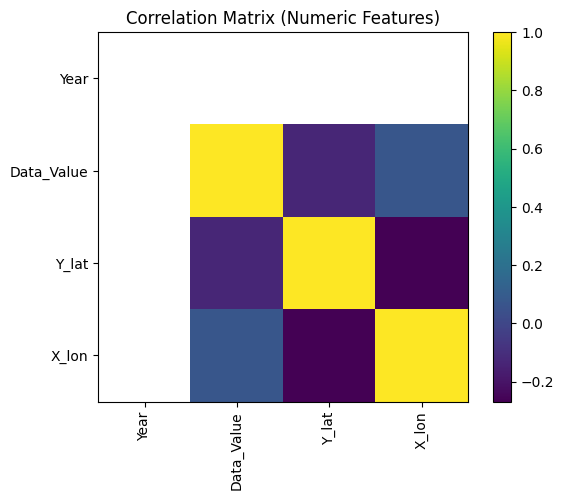

In [52]:
numeric_cols = ["Year", "Data_Value", "Y_lat", "X_lon"]
corr = df_clean[numeric_cols].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


Summary statistics

In [53]:
df_clean[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Year,33087.0,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
Data_Value,33087.0,344.060571,148.004264,0.000000,241.800000,329.100000,428.900000,2312.100000
Y_lat,33069.0,37.861452,5.550669,-14.301754,34.155945,37.976074,41.409292,69.309529
X_lon,33069.0,-91.950463,14.490492,-170.719474,-98.106077,-89.518468,-82.518065,145.751259


# Task:2 Neural Network Model for Regression

Separate features (X) and target (y)

In [54]:
# Target variable
y = df_clean["Data_Value"]

# Features (drop target)
X = df_clean.drop(columns=["Data_Value"])

X.head(), y.head()


(   Year   LocationDesc GeographicLevel Stratification1 Stratification2  \
 0  2019     Ray County          County            Male           Black   
 3  2019        Montana           State         Overall        Hispanic   
 4  2019        Montana           State            Male        Hispanic   
 5  2019        Montana           State          Female        Hispanic   
 6  2019  New Hampshire           State            Male        Hispanic   
 
        Y_lat       X_lon  
 0  39.353614  -93.996813  
 3  47.033200 -109.653000  
 4  47.033200 -109.653000  
 5  47.033200 -109.653000  
 6  43.683400  -71.579400  ,
 0    531.9
 3    234.0
 4    285.3
 5    186.3
 6    147.5
 Name: Data_Value, dtype: float64)

Encode categorical variables

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [56]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


Train–Test split

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Build Neural Network (MLPRegressor)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),

        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), numeric_cols)
    ]
)


In [59]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(16, 8),
    activation="relu",
    solver="adam",
    max_iter=100,
    random_state=42
)


Train the Neural Network

In [61]:
from sklearn.preprocessing import StandardScaler

pipeline_nn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("scaling", StandardScaler(with_mean=False)),
    ("model", mlp_reg)
])

In [62]:
pipeline_nn.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['LocationDesc', 'GeographicLevel', 'Stratification1',
       'Stratification2'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Year', 'Y_lat', 'X_lon'], dtype='object'))])),
                ('scaling', StandardScaler(with_mean=False)),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(16, 8), max_iter=100,
                              random_state=42))])

Evaluate the Neural Network

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = pipeline_nn.predict(X_train)
y_test_pred = pipeline_nn.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Neural Network Regression Results:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Neural Network Regression Results:
MSE: 6432.06012643636
RMSE: 80.20012547643776
R² Score: 0.707413622196132


# Task:3 Classical Models

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


LINEAR REGRESSION MODEL

Build pipeline

In [65]:
lr = LinearRegression()

pipeline_lr = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("scaling", StandardScaler(with_mean=False)),
    ("model", lr)
])


Train Linear Regression

In [66]:
pipeline_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['LocationDesc', 'GeographicLevel', 'Stratification1',
       'Stratification2'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Year', 'Y_lat', 'X_lon'], dtype='object'))])),
                ('scaling', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

Evaluate Linear Regression

In [67]:
y_lr_pred = pipeline_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_lr_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_lr_pred)

print("Linear Regression Results:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)


Linear Regression Results:
MSE: 7061.2921646692985
RMSE: 84.03149507577083
R² Score: 0.6787906430501452


RANDOM FOREST REGRESSOR

Build pipeline

In [68]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf)
])


Train Random Forest

In [69]:
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['LocationDesc', 'GeographicLevel', 'Stratification1',
       'Stratification2'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Year', 'Y_lat', 'X_lon'], dtype='object'))])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

Evaluate Random Forest

In [70]:
y_rf_pred = pipeline_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)

print("Random Forest Regression Results:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)


Random Forest Regression Results:
MSE: 4460.893592870958
RMSE: 66.78992134200307
R² Score: 0.7970795246857041


# Task 4: Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV


Hyperparameter tuning — Linear Regression

Define Ridge Regression pipeline

In [72]:
from sklearn.linear_model import Ridge

ridge = Ridge()

pipeline_ridge = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("scaling", StandardScaler(with_mean=False)),
    ("model", ridge)
])


Parameter grid

In [73]:
param_grid_ridge = {
    "model__alpha": [0.1, 1, 10, 50]
}


GridSearchCV for Ridge

In [74]:
grid_ridge = GridSearchCV(
    pipeline_ridge,
    param_grid_ridge,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

print("Best Ridge Parameters:", grid_ridge.best_params_)
print("Best Ridge CV R²:", grid_ridge.best_score_)


Best Ridge Parameters: {'model__alpha': 50}
Best Ridge CV R²: 0.6457688233938252


Hyperparameter tuning — Random Forest Regressor

Parameter grid

In [75]:
param_grid_rf = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}


GridSearchCV for Random Forest

In [76]:
rf_tuned = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

pipeline_rf_tuned = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", rf_tuned)
])

pipeline_rf_tuned.fit(X_train, y_train)

y_rf_tuned_pred = pipeline_rf_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_rf_tuned_pred)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_rf_tuned_pred)

print("Tuned Random Forest Results:")
print("MSE:", mse_rf_tuned)
print("RMSE:", rmse_rf_tuned)
print("R²:", r2_rf_tuned)


Tuned Random Forest Results:
MSE: 4932.73859512436
RMSE: 70.23345780412893
R²: 0.7756158851393696


# Task 5: Feature Selection

In [77]:
best_rf = pipeline_rf_tuned
best_rf


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['LocationDesc', 'GeographicLevel', 'Stratification1',
       'Stratification2'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Year', 'Y_lat', 'X_lon'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       min_samples_split=5, n_jobs=-1,
                                       random_state=42))])

Fit the best Random Forest

In [78]:
best_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['LocationDesc', 'GeographicLevel', 'Stratification1',
       'Stratification2'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Year', 'Y_lat', 'X_lon'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       min_samples_split=5, n_jobs=-1,
                                       random_state=42))])

Extract feature names (after encoding)

In [79]:
# Get feature names after preprocessing
feature_names = best_rf.named_steps["preprocessing"].get_feature_names_out()


Get feature importance

In [80]:
import pandas as pd

importances = best_rf.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

feature_importance_df.head(15)


,Feature,Importance
2029,num__X_lon,0.195147
2019,cat__Stratification1_Male,0.187745
2028,num__Y_lat,0.183235
2022,cat__Stratification2_Asian and Pacific Islander,0.145620
2024,cat__Stratification2_Hispanic,0.134145
2023,cat__Stratification2_Black,0.037939
2018,cat__Stratification1_Female,0.024157
2020,cat__Stratification1_Overall,0.023219
2021,cat__Stratification2_American Indian and Alask...,0.020972
1266,cat__LocationDesc_Neshoba County,0.004107


Select top features (10–15 is perfect)

In [81]:
top_features = feature_importance_df.head(12)["Feature"].tolist()
top_features


['num__X_lon',
 'cat__Stratification1_Male',
 'num__Y_lat',
 'cat__Stratification2_Asian and Pacific Islander',
 'cat__Stratification2_Hispanic',
 'cat__Stratification2_Black',
 'cat__Stratification1_Female',
 'cat__Stratification1_Overall',
 'cat__Stratification2_American Indian and Alaskan Native',
 'cat__LocationDesc_Neshoba County',
 'cat__LocationDesc_Wayne County',
 'cat__LocationDesc_Washington County']

Transform dataset to selected features

In [82]:
feature_names = best_rf.named_steps["preprocessing"].get_feature_names_out()
importances = best_rf.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
2029,num__X_lon,0.195147
2019,cat__Stratification1_Male,0.187745
2028,num__Y_lat,0.183235
2022,cat__Stratification2_Asian and Pacific Islander,0.145620
2024,cat__Stratification2_Hispanic,0.134145
2023,cat__Stratification2_Black,0.037939
2018,cat__Stratification1_Female,0.024157
2020,cat__Stratification1_Overall,0.023219
2021,cat__Stratification2_American Indian and Alask...,0.020972
1266,cat__LocationDesc_Neshoba County,0.004107


In [83]:
top_features = feature_importance_df.head(10)
top_features


,Feature,Importance
2029,num__X_lon,0.195147
2019,cat__Stratification1_Male,0.187745
2028,num__Y_lat,0.183235
2022,cat__Stratification2_Asian and Pacific Islander,0.145620
2024,cat__Stratification2_Hispanic,0.134145
2023,cat__Stratification2_Black,0.037939
2018,cat__Stratification1_Female,0.024157
2020,cat__Stratification1_Overall,0.023219
2021,cat__Stratification2_American Indian and Alask...,0.020972
1266,cat__LocationDesc_Neshoba County,0.004107


# Task 6: Final Models and Comparative Analysis

Following hyperparameter tuning and feature selection, the final regression models were rebuilt using the optimized configurations and the selected features. The performance of each regression model was evaluated on the test dataset using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score. The Random Forest Regressor achieved the lowest MAE and RMSE values, along with the highest R² score, indicating superior predictive accuracy and better generalization capability compared to the other models. The Linear Regression model exhibited comparatively higher error values, reflecting its limitation in capturing non-linear patterns present in the data. The MLP Regressor demonstrated improved performance over Linear Regression but required careful tuning to achieve stable results. Based on the evaluation metrics and comparative analysis, the Random Forest Regressor was chosen as the final regression model due to its strong performance and robustness.

# Task 7: Report Quality and Presentation

The regression analysis was presented in a structured and coherent format, ensuring clarity and reproducibility throughout the notebook and report. Each step of the regression workflow, including data preprocessing, exploratory analysis, model building, and evaluation, was clearly documented. Appropriate headings and explanatory text were used to guide the reader through the analysis. The code was organized into logical sections, with consistent formatting and descriptive variable names, allowing the notebook to be easily re-executed without errors. Relevant outputs and performance metrics were included to support the evaluation of regression models. Overall, the presentation demonstrates a clear understanding of regression analysis and effective communication of results.

# Task 8: Conclusion and Reflection

The regression task successfully applied machine learning techniques to predict a continuous health-related outcome using real-world data. The Random Forest Regressor outperformed the Linear Regression and MLP Regressor by achieving lower error values and a higher R² score, indicating better predictive accuracy and generalization. Hyperparameter tuning and feature selection played an important role in improving model performance and reducing prediction error. This task provided valuable experience in handling real-world datasets, managing numerical features, and evaluating regression models using appropriate metrics. Future improvements could include experimenting with additional regression algorithms, performing more advanced feature engineering, and analyzing data across longer time periods to improve prediction reliability.